## IPA - Índice de Preço do Produtor Amplo

## IPA - Índice do Produtor Amplo (IBRE - FGV)

### Carregamento dos Dados Fornecidos em xlsx

In [1]:
# Biblioteca para geração de gráficos

import matplotlib.pyplot as plt

In [2]:
#Biblioteca para acessar e interagir com APIs e páginas da web
import requests 

# Bibliotecas para dados:
import pandas as pd
import numpy as np

#Biblioteca para criação de gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
#Bibliotecas para métricas de avaliação de modelos:

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_absolute_percentage_error

from sklearn.metrics import r2_score

from sklearn.metrics import root_mean_squared_error

In [4]:
#Bibliotecas para RandomForest e Validação

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score

In [5]:
#Bibliotecas para RandomForest com AdaBoost:

from sklearn.ensemble import AdaBoostRegressor

In [6]:
#Bibliotecas para RandomForest com GradientBoosting:

from sklearn.ensemble import GradientBoostingRegressor

In [7]:
# Biblioteca para GridSearch e TimeSeriesSplit para Cross Validation

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import TimeSeriesSplit

In [8]:
#Biblioteca para criação de gráficos

import matplotlib as mpl

import matplotlib.pyplot as plt   # data visualization

import seaborn as sns

## Carregamento dos Dados do IPA

In [9]:
# Carregamento do arquivo IPA7 localizado na pasta Dados
df = pd.read_excel('Dados/IPA7.xlsx')

# Exibição das primeiras linhas do DataFrame
df.head()

,Unnamed: 0,"IPA, INCC, IPCA e outros",Índice de Preços ao Produtor Amplo por Origem - DI - IPA-OG-DI,=,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242
0,NaN,Cód.Estrutura,¨Descrição,2005-01-01 00:00:00,2005-02-01 00:00:00,2005-03-01 00:00:00,2005-04-01 00:00:00,2005-05-01 00:00:00,2005-06-01 00:00:00,2005-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
1,7.0,2011010,......AGRICULTURA E PECUÁRIA,-0.63,1.29,3.59,-1.6,-2.76,-0.98,-1.6,...,0.92,1.15,0.38,1.52,0.72,0.3,3.55,3.46,3.5,0.63
2,7.0,2021050,.........CARVÃO MINERAL,-0.18,0,0,0,3.22,1.54,0,...,0,0.63,0,0.55,0,0,-0.15,0,0,0
3,7.0,2021060,.........PETRÓLEO E GÁS NATURAL,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,7.0,2021070,.........MINERAIS METÁLICOS,-0.36,-4.2,2,15.87,2.3,-2.31,-0.17,...,-12.5,2.08,5.14,-2.42,1.51,-5.7,-4.95,9.89,1.25,5.32


In [10]:
#Remoção da primeira linha e das 2 primeiras colunhas do dataFrame

df1 = df.iloc[1:, 2:].reset_index(drop=True)

In [11]:
#Fazendo a transposição do dataFrame

df1_transposta = df1.transpose()

In [12]:
#Renomeando as colunas:

df1_transposta.columns = ["Agricultura e Pecuaria", "Carvao Mineral", "Petroleo e Gas Natural", "Minerais Metalicos",
                          "Minerais Nao-Metalicos", "Produtos Alimenticios", "Bebidas", "Fumo Processado e Produtos do Fumo",
                          "Produtos Texteis", "Artigos de Vestuario", "Couros, Artigos para Viagem e Calcados", "Madeira Desdobrada e Produtos de Madeira",
                          "Celulose, Papel e Produtos de Papel", "Produtos Derivados do Petroleo e Biocombustiveis", "Produtos Quimicos",
                          "Produtos Farmaceuticos", "Artigos de Borracha e de Material Plastico", "Produtos de Minerais Nao-Metalicos",
                           "Metalurgia Basica","Produtos de Metal", "Equipamentos de Informatica, Produtos Eletronicos e Opticos",
                           "Maquinas, Aparelhos e Materiais Eletricos","Maquinas e Equipamentos", "Veiculos Automotores, Reboques, Carrocerias e Autopecas",
                           "Embarcacoes, Veiculos Ferroviarios e Outros Equipamentos de Transporte", "Moveis"]


In [13]:
# Remover a primeira linha (índice 0) do DataFrame
df1_transposta = df1_transposta.drop(df1_transposta.index[0]).reset_index(drop=True)

In [14]:
# Criação de uma coluna de datas iniciando em 2005-01-31, com frequência mensal
datas = pd.date_range(start='2005-01-31', periods=df1_transposta.shape[0], freq='M').strftime('%Y-%m-%d')
df1_transposta.insert(0, 'Data', datas)
df1_transposta.head()

,Data,Agricultura e Pecuaria,Carvao Mineral,Petroleo e Gas Natural,Minerais Metalicos,Minerais Nao-Metalicos,Produtos Alimenticios,Bebidas,Fumo Processado e Produtos do Fumo,Produtos Texteis,...,Artigos de Borracha e de Material Plastico,Produtos de Minerais Nao-Metalicos,Metalurgia Basica,Produtos de Metal,"Equipamentos de Informatica, Produtos Eletronicos e Opticos","Maquinas, Aparelhos e Materiais Eletricos",Maquinas e Equipamentos,"Veiculos Automotores, Reboques, Carrocerias e Autopecas","Embarcacoes, Veiculos Ferroviarios e Outros Equipamentos de Transporte",Moveis
0,2005-01-31,-0.63,-0.18,-,-0.36,1.1,-,1.86,3.15,1.14,...,0.79,-0.04,1.63,1.14,-6.24,1.21,1.45,2.02,0.09,0.17
1,2005-02-28,1.29,0,-,-4.2,-3.72,-,-0.31,0.02,-0.38,...,1.01,-0.42,0.89,-0.43,-0.99,1.34,0.32,0.77,0.84,1.44
2,2005-03-31,3.59,0,-,2,3.31,-,0.74,4.62,-0.14,...,0.17,-0.6,0.1,0.66,1.83,0.46,0.16,-0.21,0.56,1.14
3,2005-04-30,-1.6,0,-,15.87,0.69,-,0.83,0.06,-0.34,...,2.28,0.11,0.09,0.84,1.48,1.54,0.34,1.12,-0.14,1.59
4,2005-05-31,-2.76,3.22,-,2.3,-3.04,-,0.77,-0.14,-0.48,...,3.37,-0.09,-1.09,0.16,-4.96,0.47,1.72,0.43,-3.54,0.09


As desagregações abaixo estão disposíveis apenas a partir de janeiro de 2008:


Produtos Químicos

Produtos Alimentícios

Já a desagregação de Petróleo e Gás Natural não está disponível

In [15]:
df1_transposta.iloc[2,1]

3.59

In [16]:
type(df1_transposta.iloc[2,1])

float

### Conversão da data para formato datatime

In [17]:
#Download da biblioteca de formatação de data
from datetime import datetime

In [18]:
# Criação de um dataframe do tipo datetime

date_rng = pd.date_range(start = '1/31/2005', 
                         end = '12/31/2024', 
                         freq = 'M')

In [19]:
#Checando se o comprimento do dataframe de data é igual ao comprimento do dataframe da variação mensal das desagregações IPA

len(date_rng) == len(df1_transposta.index)

True

In [20]:
#Inclusão do dataframe date_rng no dataframe df1_transposta

df1_transposta.insert(0,        # coluna de indice 0
            'Mes',    # nome da nova coluna
            date_rng)  # dados

In [21]:
#Exclusão da coluna "Data"

df1_transposta = df1_transposta.drop(["Data"], axis = 1)

In [22]:
#Criação de uma cópia do dataframe para uso

df_ipa = df1_transposta.copy()

### Gráfico das séries das desagregações do IPA

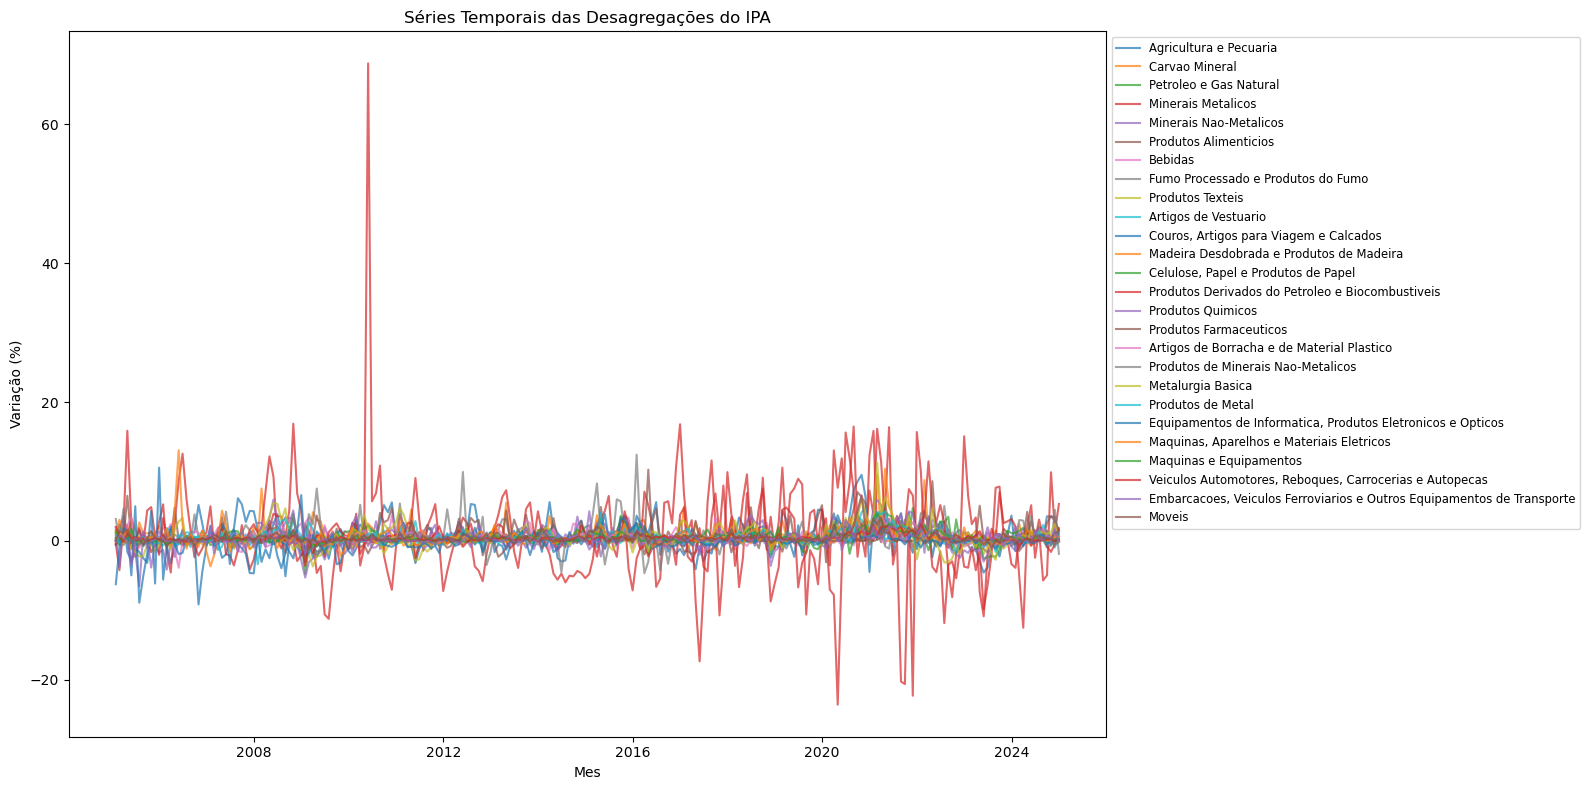

In [23]:
plt.figure(figsize=(16, 8))
for col in df_ipa.columns[1:]:
    plt.plot(df_ipa['Mes'], pd.to_numeric(df_ipa[col].replace('-', None)), label=col, alpha=0.7)

plt.xlabel('Mes')
plt.ylabel('Variação (%)')
plt.title('Séries Temporais das Desagregações do IPA')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1, fontsize='small')
plt.tight_layout()
plt.show()

### Análise do gráfico das séries temporais das desagregações do IPA:

1. Necessário checar valores de variação mensal da desagregação de Minerais Metálicos (por exemplo, pico de variação mensal de 68,76% em maio/2010). Dados a partir de 2020 apresentam variação mensal entre -20% a 20%.

### Carregamento de Dados do IPCA de Serviços

In [24]:
# Carregar os dados do arquivo ipeadata_IPCA_serv_var.csv
df_ipca_serv = pd.read_csv('ipeadata_IPCA_serv_var.csv', sep = ";")

# Exibir as primeiras linhas do DataFrame
df_ipca_serv.head()

,Data,"IPCA - preços livres - serviços - taxa de variação - (% a.m.) - Banco Central do Brasil, Boletim, Seção Atividade Econômica (Bacen / Boletim / Ativ. Ec.) - BM12_IPCAPLSER12",Unnamed: 2
0,1992.01,"25,84",NaN
1,1992.02,"22,17",NaN
2,1992.03,"20,74",NaN
3,1992.04,"20,14",NaN
4,1992.05,"26,93",NaN


In [25]:
df_ipca_serv.columns

Index(['Data',
       'IPCA - preços livres - serviços - taxa de variação - (% a.m.) - Banco Central do Brasil, Boletim, Seção Atividade Econômica (Bacen / Boletim / Ativ. Ec.) - BM12_IPCAPLSER12',
       'Unnamed: 2'],
      dtype='object')

In [26]:
# Removendo coluna Unnamed: 2 do DataFrame df_ipca_serv
df_ipca_serv = df_ipca_serv.drop('Unnamed: 2', axis=1)

In [27]:
#Renomeando as colunas do DataFrame df_ipca_serv:

df_ipca_serv.columns = ['Data', 'IPCA Serv Var Mensal (%)']

df_ipca_serv.head()

,Data,IPCA Serv Var Mensal (%)
0,1992.01,"25,84"
1,1992.02,"22,17"
2,1992.03,"20,74"
3,1992.04,"20,14"
4,1992.05,"26,93"


In [28]:
#Substituição de , para . como separador decimal

df_ipca_serv["IPCA Serv Var Mensal (%)"] = df_ipca_serv["IPCA Serv Var Mensal (%)"].str.replace(",",".").astype(float)

In [29]:
df_ipca_serv.iloc[156:396,:]

,Data,IPCA Serv Var Mensal (%)
156,2005.01,0.46
157,2005.02,1.82
158,2005.03,0.51
159,2005.04,0.35
160,2005.05,0.28
...,...,...
391,2024.08,0.24
392,2024.09,0.15
393,2024.10,0.35
394,2024.11,0.83


In [30]:
#Criação de dataframe para IPCA de serviços no mesmo período do IPA de jan/2005 a dez/2024

df_ipca_servicos = df_ipca_serv.loc[156:395,"IPCA Serv Var Mensal (%)"].copy()

In [31]:
#Reset do Índice do dataframe de ipca de serviços

df_ipca_servicos.reset_index(drop = True, inplace = True)

In [32]:
df_ipca_servicos

0      0.46
1      1.82
2      0.51
3      0.35
4      0.28
       ... 
235    0.24
236    0.15
237    0.35
238    0.83
239    0.66
Name: IPCA Serv Var Mensal (%), Length: 240, dtype: float64

In [33]:
#Checando comprimento dos dataframes:

len(df_ipca_servicos) == len(df_ipa)

True

In [34]:
#Concatenando dataframe de ipca de serviços ao dataframe da base de dados do ipa:

df_ipa = pd.concat([df_ipa, df_ipca_servicos], axis = 1)

In [35]:
df_ipa

,Mes,Agricultura e Pecuaria,Carvao Mineral,Petroleo e Gas Natural,Minerais Metalicos,Minerais Nao-Metalicos,Produtos Alimenticios,Bebidas,Fumo Processado e Produtos do Fumo,Produtos Texteis,...,Produtos de Minerais Nao-Metalicos,Metalurgia Basica,Produtos de Metal,"Equipamentos de Informatica, Produtos Eletronicos e Opticos","Maquinas, Aparelhos e Materiais Eletricos",Maquinas e Equipamentos,"Veiculos Automotores, Reboques, Carrocerias e Autopecas","Embarcacoes, Veiculos Ferroviarios e Outros Equipamentos de Transporte",Moveis,IPCA Serv Var Mensal (%)
0,2005-01-31,-0.63,-0.18,-,-0.36,1.1,-,1.86,3.15,1.14,...,-0.04,1.63,1.14,-6.24,1.21,1.45,2.02,0.09,0.17,0.46
1,2005-02-28,1.29,0,-,-4.2,-3.72,-,-0.31,0.02,-0.38,...,-0.42,0.89,-0.43,-0.99,1.34,0.32,0.77,0.84,1.44,1.82
2,2005-03-31,3.59,0,-,2,3.31,-,0.74,4.62,-0.14,...,-0.6,0.1,0.66,1.83,0.46,0.16,-0.21,0.56,1.14,0.51
3,2005-04-30,-1.6,0,-,15.87,0.69,-,0.83,0.06,-0.34,...,0.11,0.09,0.84,1.48,1.54,0.34,1.12,-0.14,1.59,0.35
4,2005-05-31,-2.76,3.22,-,2.3,-3.04,-,0.77,-0.14,-0.48,...,-0.09,-1.09,0.16,-4.96,0.47,1.72,0.43,-3.54,0.09,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2024-08-31,0.3,0,-,-5.7,0.42,0.17,0.29,0.15,0.49,...,0.37,1.21,0.36,0.89,0.36,0.05,0.15,0.14,0.42,0.24
236,2024-09-30,3.55,-0.15,-,-4.95,0.71,2.56,0.62,-0.94,0.52,...,1.5,1.04,-0.57,-0.48,0.03,0.38,0.23,0.65,0.4,0.15
237,2024-10-31,3.46,0,-,9.89,0.11,3.59,0.52,-0.69,0.83,...,0.22,1.23,0.15,0.15,0.07,0.24,0.22,0.13,0.27,0.35
238,2024-11-30,3.5,0,-,1.25,1.77,2.87,0.76,4.47,-0.05,...,-0.52,2.42,0.24,-0.08,0.54,0.22,0,1.56,1.02,0.83


# Utilização de Métodos de Machine Learning para Recuperação dos Dados das Desagregações "Produtos Alimenticios e Produtos Químicos de janeiro/2005 a dezembro/2007.

### Separação da base de dados a ser utilizada para treinamento e teste:

In [36]:
df_ipa.iloc[0:36,:]

,Mes,Agricultura e Pecuaria,Carvao Mineral,Petroleo e Gas Natural,Minerais Metalicos,Minerais Nao-Metalicos,Produtos Alimenticios,Bebidas,Fumo Processado e Produtos do Fumo,Produtos Texteis,...,Produtos de Minerais Nao-Metalicos,Metalurgia Basica,Produtos de Metal,"Equipamentos de Informatica, Produtos Eletronicos e Opticos","Maquinas, Aparelhos e Materiais Eletricos",Maquinas e Equipamentos,"Veiculos Automotores, Reboques, Carrocerias e Autopecas","Embarcacoes, Veiculos Ferroviarios e Outros Equipamentos de Transporte",Moveis,IPCA Serv Var Mensal (%)
0,2005-01-31,-0.63,-0.18,-,-0.36,1.1,-,1.86,3.15,1.14,...,-0.04,1.63,1.14,-6.24,1.21,1.45,2.02,0.09,0.17,0.46
1,2005-02-28,1.29,0,-,-4.2,-3.72,-,-0.31,0.02,-0.38,...,-0.42,0.89,-0.43,-0.99,1.34,0.32,0.77,0.84,1.44,1.82
2,2005-03-31,3.59,0,-,2,3.31,-,0.74,4.62,-0.14,...,-0.6,0.1,0.66,1.83,0.46,0.16,-0.21,0.56,1.14,0.51
3,2005-04-30,-1.6,0,-,15.87,0.69,-,0.83,0.06,-0.34,...,0.11,0.09,0.84,1.48,1.54,0.34,1.12,-0.14,1.59,0.35
4,2005-05-31,-2.76,3.22,-,2.3,-3.04,-,0.77,-0.14,-0.48,...,-0.09,-1.09,0.16,-4.96,0.47,1.72,0.43,-3.54,0.09,0.28
5,2005-06-30,-0.98,1.54,-,-2.31,-1.4,-,0.27,0,-0.71,...,-0.67,-1.59,0,4.99,-0.02,0.02,0.51,0.46,0.09,0.50
6,2005-07-31,-1.6,0,-,-0.17,-6.53,-,0.15,0,-0.15,...,-0.48,-2.24,0.41,-8.9,0.66,-0.11,0.36,0,0.18,0.59
7,2005-08-31,-2.47,0,-,0.84,1.01,-,0.22,0,-0.76,...,-0.22,-2.21,0.56,-5.02,0.1,0.12,0.33,1.4,-0.52,0.44
8,2005-09-30,-3.17,0,-,0.25,0.43,-,0.16,0,0.32,...,0.23,-0.5,0.39,-1.86,0.57,0.09,-0.03,-0.96,0.33,0.44
9,2005-10-31,0.8,0.64,-,-1.62,-3.84,-,0.35,0,0.13,...,-0.59,-0.65,0.23,4.31,0.35,-0.17,0.23,-0.11,1.43,0.56


In [37]:
# Base de dados completa de janeiro de 2008 a dezembro de 2024 - será utilizada para treinamento e validação

df_ipa_2008 = df_ipa.iloc[36:,:].copy()

In [38]:
# Base de dados a ser completada para desagregações de Produtos Alimentícios e Produtos Químicos:

df_ipa_2005 = df_ipa.iloc[:36,:]

In [39]:
#Reset do índice da base de dados a partir de 2008:

df_ipa_2008.reset_index(drop = True, inplace = True)


## Separação da base de dados df_ipa_2008 em treinamento e teste

80% da base de dados será utilizada para treinamento do modelo. O restante será utilizado para teste.

In [40]:
#Criação das bases de dados de treinamento e teste:

df_ipa_trein = df_ipa_2008.iloc[:165,:].copy()

df_ipa_teste = df_ipa_2008.iloc[165:,:].copy()


In [41]:
# Reset do índice da base de dados de teste:

df_ipa_teste.reset_index(drop = True, inplace = True)

In [42]:
df_ipa_trein.columns

Index(['Mes', 'Agricultura e Pecuaria', 'Carvao Mineral',
       'Petroleo e Gas Natural', 'Minerais Metalicos',
       'Minerais Nao-Metalicos', 'Produtos Alimenticios', 'Bebidas',
       'Fumo Processado e Produtos do Fumo', 'Produtos Texteis',
       'Artigos de Vestuario', 'Couros, Artigos para Viagem e Calcados',
       'Madeira Desdobrada e Produtos de Madeira',
       'Celulose, Papel e Produtos de Papel',
       'Produtos Derivados do Petroleo e Biocombustiveis', 'Produtos Quimicos',
       'Produtos Farmaceuticos', 'Artigos de Borracha e de Material Plastico',
       'Produtos de Minerais Nao-Metalicos', 'Metalurgia Basica',
       'Produtos de Metal',
       'Equipamentos de Informatica, Produtos Eletronicos e Opticos',
       'Maquinas, Aparelhos e Materiais Eletricos', 'Maquinas e Equipamentos',
       'Veiculos Automotores, Reboques, Carrocerias e Autopecas',
       'Embarcacoes, Veiculos Ferroviarios e Outros Equipamentos de Transporte',
       'Moveis', 'IPCA Serv Var Me

In [43]:
#Criação do dataframe de variáveis exógenas para treinamento:

df_ipa_exog_trein = df_ipa_trein.iloc[:, list(range(1, 3)) + list(range(4, 6)) + list(range(7, 15)) + list(range(16, df_ipa_trein.shape[1]-1))].copy()

df_ipa_exog_trein.head()

,Agricultura e Pecuaria,Carvao Mineral,Minerais Metalicos,Minerais Nao-Metalicos,Bebidas,Fumo Processado e Produtos do Fumo,Produtos Texteis,Artigos de Vestuario,"Couros, Artigos para Viagem e Calcados",Madeira Desdobrada e Produtos de Madeira,...,Artigos de Borracha e de Material Plastico,Produtos de Minerais Nao-Metalicos,Metalurgia Basica,Produtos de Metal,"Equipamentos de Informatica, Produtos Eletronicos e Opticos","Maquinas, Aparelhos e Materiais Eletricos",Maquinas e Equipamentos,"Veiculos Automotores, Reboques, Carrocerias e Autopecas","Embarcacoes, Veiculos Ferroviarios e Outros Equipamentos de Transporte",Moveis
0,1.6,0.06,0.27,0.92,0.58,0,0.42,-3.36,0.01,1.39,...,0.21,0.18,0.88,0.1,0.59,0.34,0.23,0.45,0.4,0.67
1,-0.19,7.55,1.94,2.06,0.53,0.8,0.65,0,-0.04,0.82,...,0.43,1.17,1.52,0.84,-3.02,0.66,0.26,0.15,0.57,0.73
2,0.46,0,7.16,0.73,0.9,0.51,0.17,0.03,0.73,0.03,...,-0.91,1.34,2.33,1.41,-1.21,-0.01,-0.16,0.18,-0.83,0.54
3,0.08,2.96,12.17,3.37,-0.1,0,-0.04,-0.28,0,0.5,...,-0.62,0.04,3.44,0.64,-2.5,0.95,0.18,0.87,1.46,0.37
4,2.47,0.7,9.24,5.95,1.44,0,-0.09,-0.5,-0.43,0.36,...,-0.25,0.72,5.47,1.56,0.64,0.86,0.36,0.37,0.35,0.96


In [44]:
#Criação do dataframe de variáveis exógenas para teste:

df_ipa_exog_teste = df_ipa_teste.iloc[:, list(range(1, 3)) + list(range(4, 6)) + list(range(7, 15)) + list(range(16, df_ipa_trein.shape[1]-1))].copy()

df_ipa_exog_teste.head()

,Agricultura e Pecuaria,Carvao Mineral,Minerais Metalicos,Minerais Nao-Metalicos,Bebidas,Fumo Processado e Produtos do Fumo,Produtos Texteis,Artigos de Vestuario,"Couros, Artigos para Viagem e Calcados",Madeira Desdobrada e Produtos de Madeira,...,Artigos de Borracha e de Material Plastico,Produtos de Minerais Nao-Metalicos,Metalurgia Basica,Produtos de Metal,"Equipamentos de Informatica, Produtos Eletronicos e Opticos","Maquinas, Aparelhos e Materiais Eletricos",Maquinas e Equipamentos,"Veiculos Automotores, Reboques, Carrocerias e Autopecas","Embarcacoes, Veiculos Ferroviarios e Outros Equipamentos de Transporte",Moveis
0,-0.06,0,4,0.4,0.23,0.73,2.15,4.08,0.4,3.25,...,1.83,1.1,3.65,1.66,0.28,1.46,1.3,1.33,0.92,1.94
1,-1.71,0,-22.29,1.62,1.27,1.14,2.6,0.54,1.4,0.88,...,2.7,0.93,0.56,0.97,0.92,1.8,1.57,1.52,0.75,1.24
2,1.54,0,15.68,1.94,0.38,0.01,1.64,0.41,-0.04,0.58,...,1.99,1.11,-2.66,-1.13,-0.04,-0.07,0.57,0.93,0.76,0.34
3,2.63,2.21,10.08,2.94,1.11,4,1.74,2.28,1.04,1.9,...,1.33,2.49,-0.04,0.58,-0.96,0.94,1.45,2.39,1.84,0.37
4,4.33,8.76,-0.08,0.92,0.61,3.47,1.36,1.2,0.72,0.64,...,0.32,1.68,0.54,0.85,0.03,1.22,2.34,1.4,0.44,-0.38


In [45]:
#Criação do dataframe de variáveis exógenas para regressão de jan/2005 a dez/2007:

df_ipa_exog_2005 = df_ipa_2005.iloc[:, list(range(1, 3)) + list(range(4, 6)) + list(range(7, 15)) + list(range(16, df_ipa_trein.shape[1]-1))].copy()

df_ipa_exog_2005.head()

,Agricultura e Pecuaria,Carvao Mineral,Minerais Metalicos,Minerais Nao-Metalicos,Bebidas,Fumo Processado e Produtos do Fumo,Produtos Texteis,Artigos de Vestuario,"Couros, Artigos para Viagem e Calcados",Madeira Desdobrada e Produtos de Madeira,...,Artigos de Borracha e de Material Plastico,Produtos de Minerais Nao-Metalicos,Metalurgia Basica,Produtos de Metal,"Equipamentos de Informatica, Produtos Eletronicos e Opticos","Maquinas, Aparelhos e Materiais Eletricos",Maquinas e Equipamentos,"Veiculos Automotores, Reboques, Carrocerias e Autopecas","Embarcacoes, Veiculos Ferroviarios e Outros Equipamentos de Transporte",Moveis
0,-0.63,-0.18,-0.36,1.1,1.86,3.15,1.14,0.1,0.52,0.28,...,0.79,-0.04,1.63,1.14,-6.24,1.21,1.45,2.02,0.09,0.17
1,1.29,0,-4.2,-3.72,-0.31,0.02,-0.38,0.05,2.35,3.06,...,1.01,-0.42,0.89,-0.43,-0.99,1.34,0.32,0.77,0.84,1.44
2,3.59,0,2,3.31,0.74,4.62,-0.14,0.87,1.43,0.99,...,0.17,-0.6,0.1,0.66,1.83,0.46,0.16,-0.21,0.56,1.14
3,-1.6,0,15.87,0.69,0.83,0.06,-0.34,0.52,-0.19,0.61,...,2.28,0.11,0.09,0.84,1.48,1.54,0.34,1.12,-0.14,1.59
4,-2.76,3.22,2.3,-3.04,0.77,-0.14,-0.48,0.1,-0.23,0.98,...,3.37,-0.09,-1.09,0.16,-4.96,0.47,1.72,0.43,-3.54,0.09


In [46]:
df_ipa_2005

,Mes,Agricultura e Pecuaria,Carvao Mineral,Petroleo e Gas Natural,Minerais Metalicos,Minerais Nao-Metalicos,Produtos Alimenticios,Bebidas,Fumo Processado e Produtos do Fumo,Produtos Texteis,...,Produtos de Minerais Nao-Metalicos,Metalurgia Basica,Produtos de Metal,"Equipamentos de Informatica, Produtos Eletronicos e Opticos","Maquinas, Aparelhos e Materiais Eletricos",Maquinas e Equipamentos,"Veiculos Automotores, Reboques, Carrocerias e Autopecas","Embarcacoes, Veiculos Ferroviarios e Outros Equipamentos de Transporte",Moveis,IPCA Serv Var Mensal (%)
0,2005-01-31,-0.63,-0.18,-,-0.36,1.1,-,1.86,3.15,1.14,...,-0.04,1.63,1.14,-6.24,1.21,1.45,2.02,0.09,0.17,0.46
1,2005-02-28,1.29,0,-,-4.2,-3.72,-,-0.31,0.02,-0.38,...,-0.42,0.89,-0.43,-0.99,1.34,0.32,0.77,0.84,1.44,1.82
2,2005-03-31,3.59,0,-,2,3.31,-,0.74,4.62,-0.14,...,-0.6,0.1,0.66,1.83,0.46,0.16,-0.21,0.56,1.14,0.51
3,2005-04-30,-1.6,0,-,15.87,0.69,-,0.83,0.06,-0.34,...,0.11,0.09,0.84,1.48,1.54,0.34,1.12,-0.14,1.59,0.35
4,2005-05-31,-2.76,3.22,-,2.3,-3.04,-,0.77,-0.14,-0.48,...,-0.09,-1.09,0.16,-4.96,0.47,1.72,0.43,-3.54,0.09,0.28
5,2005-06-30,-0.98,1.54,-,-2.31,-1.4,-,0.27,0,-0.71,...,-0.67,-1.59,0,4.99,-0.02,0.02,0.51,0.46,0.09,0.50
6,2005-07-31,-1.6,0,-,-0.17,-6.53,-,0.15,0,-0.15,...,-0.48,-2.24,0.41,-8.9,0.66,-0.11,0.36,0,0.18,0.59
7,2005-08-31,-2.47,0,-,0.84,1.01,-,0.22,0,-0.76,...,-0.22,-2.21,0.56,-5.02,0.1,0.12,0.33,1.4,-0.52,0.44
8,2005-09-30,-3.17,0,-,0.25,0.43,-,0.16,0,0.32,...,0.23,-0.5,0.39,-1.86,0.57,0.09,-0.03,-0.96,0.33,0.44
9,2005-10-31,0.8,0.64,-,-1.62,-3.84,-,0.35,0,0.13,...,-0.59,-0.65,0.23,4.31,0.35,-0.17,0.23,-0.11,1.43,0.56


### Criação de função para avaliação de desempenho dos modelos

In [47]:
#Função para avaliação do modelo:

def aval_modelo(y_teste, y_pred):
    mse = mean_squared_error(y_teste, y_pred)
    rmse = root_mean_squared_error(y_teste, y_pred)
    mape = mean_absolute_percentage_error(y_teste, y_pred)
    r2_modelo = r2_score(y_teste, y_pred)
    neg_mae = -mean_absolute_error(y_teste, y_pred)
    
    print(f'\nRaiz do Erro Quadrático Médio do Modelo: {rmse:.2f}')
    print(f'\nErro Quadrático Médio do Modelo: {mse:.2f}')
    print(f'\nErro Absoluto Médio NEGATIVO do Modelo: {neg_mae:.2f}')
    print(f'\nErro Percentual Absoluto Médio: {mape:.2f}')
    print(f'\nR^2 do Modelo: {r2_modelo:.2f}')
    print('\n')
    print("Para Erro Absoluto Médio NEGATIVO, vale a convenção de quanto maior melhor, deve-se escolher o modelo que apresenta maior valor de erro absoluto médio negativo.")
    print('\n')
    print("Para modelos obtidos por machine learning não se deve considerar o R^2")

In [48]:
#Função para geração de gráficos:

def plot_df(df, x, y, title="", xlabel='Data', ylabel= '%', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

## Modelagem para obtenção de dados faltantes: Variação Mensal do IPA - Produtos Alimentícios

### Modelos de Predição Utilizando RandomForest

#### Busca do Melhor Modelo de RandomForest com GridSearch e Cross Validation

In [49]:
# Configuração do TimeSeriesSplit (divisão da base de treinamento)
tscv = TimeSeriesSplit(n_splits=4)  

# Definição dos hiperparâmetros a serem testados
param_grid = [
    {'n_estimators': [10, 20, 30, 35, 40, 45, 50, 70], 'max_features': [2, 5, 10, 15, 20, 25, 30, 50]},
    {'bootstrap': [False], 'n_estimators': [10, 20, 30, 35, 40, 45, 50, 70], 'max_features': [2, 5, 10, 15, 20, 25, 30, 50]},
]

#bootstrap = False indica que a amostragem de dados para as árvores não deve ser feita com reposição


# Modelo a ser ajustado
forest_reg = RandomForestRegressor(random_state = 42)

# Configuração do GridSearchCV
grid_search = GridSearchCV(
    estimator=forest_reg,
    param_grid=param_grid,
    cv = tscv,  
    scoring= {'neg_mean_squared_error': 'neg_mean_squared_error',
               'r2': 'r2', 
               "neg_mean_absolute_error": "neg_mean_absolute_error",
               "neg_mean_absolute_percentage_error":"neg_mean_absolute_percentage_error"},
    refit='neg_mean_squared_error',
    return_train_score=True
)

grid_search.fit(df_ipa_exog_trein, df_ipa_trein["Produtos Alimenticios"])

# Melhores parâmetros
print("Melhores parâmetros:", grid_search.best_params_)

# Melhor desempenho
print("Melhor score (MSE negativo):", grid_search.best_score_)

Melhores parâmetros: {'bootstrap': False, 'max_features': 15, 'n_estimators': 40}
Melhor score (MSE negativo): -2.02451171969697


In [50]:
#Obtenção dos resultados de cada modelo cujos parâmetros foram considerados para o GridSearch

results = grid_search.cv_results_

In [51]:
# Extraindo os MSEs, MSREs e R²s dos Resultados do GridSearch
mses = -results['mean_test_neg_mean_squared_error'] 
msres = np.sqrt(mses) 
r2s = results['mean_test_r2']  
mape = -results["mean_test_neg_mean_absolute_percentage_error"] 
mae = -results['mean_test_neg_mean_absolute_error'] 

# Organizando em um DataFrame para visualização
param_combinations = results['params']
metrics_df = pd.DataFrame({
    'Params': param_combinations,
    'Mean MSE': mses,
    'Mean MSRE': msres,
    'Mean MAPE': mape,
    'Mean MAE': mae,
    'Mean R^2': r2s
})

# Ordenar os resultados por MSRE (ou outra métrica, se preferir)
metrics_df_sorted = metrics_df.sort_values(by='Mean MSRE')
metrics_df_sorted.round(2)

,Params,Mean MSE,Mean MSRE,Mean MAPE,Mean MAE,Mean R^2
92,"{'bootstrap': False, 'max_features': 15, 'n_es...",2.02,1.42,2.117033e+13,1.09,0.29
93,"{'bootstrap': False, 'max_features': 15, 'n_es...",2.04,1.43,2.378416e+13,1.09,0.28
94,"{'bootstrap': False, 'max_features': 15, 'n_es...",2.04,1.43,2.606629e+13,1.09,0.29
90,"{'bootstrap': False, 'max_features': 15, 'n_es...",2.04,1.43,1.406806e+13,1.09,0.28
91,"{'bootstrap': False, 'max_features': 15, 'n_es...",2.05,1.43,1.704934e+13,1.09,0.28
...,...,...,...,...,...,...
5,"{'max_features': 2, 'n_estimators': 45}",2.79,1.67,2.542183e+13,1.28,0.06
8,"{'max_features': 5, 'n_estimators': 10}",2.80,1.67,3.783706e+13,1.23,0.06
1,"{'max_features': 2, 'n_estimators': 20}",2.87,1.70,2.584452e+13,1.31,0.03
64,"{'bootstrap': False, 'max_features': 2, 'n_est...",2.98,1.72,3.439112e+13,1.29,0.00


In [52]:
#Geração do Regressor por RandomForest

regres_randfor = RandomForestRegressor(n_estimators=40, max_features = 15, random_state=42, oob_score=True)

regres_randfor.fit(df_ipa_exog_trein, df_ipa_trein["Produtos Alimenticios"])

RandomForestRegressor(max_features=15, n_estimators=40, oob_score=True,
                      random_state=42)

In [53]:
# Predições de IPA - Produtos Alimentícios (Base Teste)

ipa_pred_randfor_alim = regres_randfor.predict(df_ipa_exog_teste)

In [54]:
# Avaliação do Modelo para Base de Teste:

aval_modelo( df_ipa_teste["Produtos Alimenticios"], ipa_pred_randfor_alim)


Raiz do Erro Quadrático Médio do Modelo: 1.17

Erro Quadrático Médio do Modelo: 1.36

Erro Absoluto Médio NEGATIVO do Modelo: -0.96

Erro Percentual Absoluto Médio: 85395177549757.28

R^2 do Modelo: 0.27


Para Erro Absoluto Médio NEGATIVO, vale a convenção de quanto maior melhor, deve-se escolher o modelo que apresenta maior valor de erro absoluto médio negativo.


Para modelos obtidos por machine learning não se deve considerar o R^2


### Modelos de Predição Utilizando RandomForest com GradientBoosting

#### Busca do Melhor Modelo de RandomForest com GradientBoosting com GridSearch e Cross Validation

In [55]:
# Configuração do TimeSeriesSplit (divisão da base de treinamento)
tscv = TimeSeriesSplit(n_splits=4)  

# Definição dos hiperparâmetros a serem testados
param_grid = [
    {"n_estimators": [5, 10, 15, 20, 30], "learning_rate": [0.001, 0.01, 0.1, 0.2, 0.5],
     "max_depth": [20], "loss": ["squared_error", "absolute_error", "huber"],"random_state": [42]}]

# Definir o modelo GradientBoostingRegressor
gbr = GradientBoostingRegressor()


# Configuração do GridSearchCV
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv = tscv,  
    scoring= {'neg_mean_squared_error': 'neg_mean_squared_error',
               'r2': 'r2', 
               "neg_mean_absolute_error": "neg_mean_absolute_error",
               "neg_mean_absolute_percentage_error":"neg_mean_absolute_percentage_error"},
    refit='neg_mean_squared_error',
    return_train_score=True
)

grid_search.fit(df_ipa_exog_trein, df_ipa_trein["Produtos Alimenticios"])

# Melhores parâmetros
print("Melhores parâmetros:", grid_search.best_params_)

# Melhor desempenho
print("Melhor score (MSE negativo):", grid_search.best_score_)


Melhores parâmetros: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 20, 'n_estimators': 10, 'random_state': 42}
Melhor score (MSE negativo): -2.3098507846478924


In [56]:
#Obtenção dos resultados de cada modelo cujos parâmetros foram considerados para o GridSearch

results = grid_search.cv_results_

In [57]:
# Extraindo os MSEs, MSREs e R²s dos Resultados do GridSearch
mses = -results['mean_test_neg_mean_squared_error'] 
msres = np.sqrt(mses) 
r2s = results['mean_test_r2']  
mape = -results["mean_test_neg_mean_absolute_percentage_error"] 
mae = -results['mean_test_neg_mean_absolute_error'] 

# Organizando em um DataFrame para visualização
param_combinations = results['params']
metrics_df = pd.DataFrame({
    'Params': param_combinations,
    'Mean MSE': mses,
    'Mean MSRE': msres,
    'Mean MAPE': mape,
    'Mean MAE': mae,
    'Mean R^2': r2s
})

# Ordenar os resultados por MSRE (ou outra métrica, se preferir)
metrics_df_sorted = metrics_df.sort_values(by='Mean MSRE')
metrics_df_sorted.round(2)

,Params,Mean MSE,Mean MSRE,Mean MAPE,Mean MAE,Mean R^2
31,"{'learning_rate': 0.1, 'loss': 'squared_error'...",2.31,1.52,5.456284e+12,1.17,0.19
45,"{'learning_rate': 0.2, 'loss': 'squared_error'...",2.33,1.53,8.650557e+12,1.19,0.19
32,"{'learning_rate': 0.1, 'loss': 'squared_error'...",2.39,1.55,1.204852e+13,1.21,0.15
30,"{'learning_rate': 0.1, 'loss': 'squared_error'...",2.43,1.56,4.561694e+12,1.18,0.18
33,"{'learning_rate': 0.1, 'loss': 'squared_error'...",2.49,1.58,1.624211e+13,1.24,0.10
...,...,...,...,...,...,...
8,"{'learning_rate': 0.001, 'loss': 'absolute_err...",3.41,1.85,1.230098e+13,1.38,-0.11
7,"{'learning_rate': 0.001, 'loss': 'absolute_err...",3.42,1.85,1.253759e+13,1.38,-0.11
10,"{'learning_rate': 0.001, 'loss': 'huber', 'max...",3.42,1.85,1.245059e+13,1.38,-0.11
6,"{'learning_rate': 0.001, 'loss': 'absolute_err...",3.42,1.85,1.276922e+13,1.38,-0.11


In [58]:
#Criando variável contendo parâmetros para servir de entrada para o GradientBoostingRegressor:

params = {'n_estimators': 10, 'max_depth': 20, 'learning_rate': 0.1, 'loss': "squared_error", "random_state": 42}

In [59]:
#Geração do modelo de RandomForest Regression com Gradient Boosting:

regres_randfor_grad = GradientBoostingRegressor(**params)

In [60]:
#Ajuste do modelo:

regres_randfor_grad.fit(df_ipa_exog_trein, df_ipa_trein["Produtos Alimenticios"])

GradientBoostingRegressor(max_depth=20, n_estimators=10, random_state=42)

In [61]:
# Predições de IPA - Produtos Alimentícios (Base Teste)

ipa_pred_randfor_grad_alim = regres_randfor_grad.predict(df_ipa_exog_teste)

In [62]:
# Avaliação do Modelo para Base de Teste:

aval_modelo( df_ipa_teste["Produtos Alimenticios"], ipa_pred_randfor_grad_alim)


Raiz do Erro Quadrático Médio do Modelo: 1.30

Erro Quadrático Médio do Modelo: 1.69

Erro Absoluto Médio NEGATIVO do Modelo: -1.09

Erro Percentual Absoluto Médio: 52995269596350.04

R^2 do Modelo: 0.09


Para Erro Absoluto Médio NEGATIVO, vale a convenção de quanto maior melhor, deve-se escolher o modelo que apresenta maior valor de erro absoluto médio negativo.


Para modelos obtidos por machine learning não se deve considerar o R^2


### Modelos de Predição Utilizando RandomForest com AdaBoost

#### Busca do Melhor Modelo de RandomForest com AdaBoost com GridSearch e Cross Validation

In [63]:
# Configuração do TimeSeriesSplit (divisão da base de treinamento)
tscv = TimeSeriesSplit(n_splits=4)  

# Definição dos hiperparâmetros a serem testados
param_grid = [
    {"n_estimators": [5, 10, 20, 30, 40], "learning_rate": [0.01, 0.05, 0.1, 0.5],
     "loss": ['linear', 'square', 'exponential'],"random_state": [42]}]

# Definir o modelo base para o AdaBoost (Árvore de Decisão)
base_modelo = RandomForestRegressor(max_depth=10)

# Definir o modelo AdaBoost para regressão
adaboost = AdaBoostRegressor(estimator=base_modelo)


# Configuração do GridSearchCV
grid_search = GridSearchCV(
    estimator=adaboost,
    param_grid=param_grid,
    cv = tscv,  
    scoring= {'neg_mean_squared_error': 'neg_mean_squared_error',
               'r2': 'r2', 
               "neg_mean_absolute_error": "neg_mean_absolute_error",
               "neg_mean_absolute_percentage_error":"neg_mean_absolute_percentage_error"},
    refit='neg_mean_squared_error',
    return_train_score=True
)

grid_search.fit(df_ipa_exog_trein, df_ipa_trein["Produtos Alimenticios"])

# Melhores parâmetros
print("Melhores parâmetros:", grid_search.best_params_)

# Melhor desempenho
print("Melhor score (MSE negativo):", grid_search.best_score_)


Melhores parâmetros: {'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 20, 'random_state': 42}
Melhor score (MSE negativo): -1.980446994264872


In [64]:
#Obtenção dos resultados de cada modelo cujos parâmetros foram considerados para o AdaBoost

results = grid_search.cv_results_

In [65]:
# Extraindo os MSEs, MSREs e R²s dos Resultados do GridSearch
mses = -results['mean_test_neg_mean_squared_error'] 
msres = np.sqrt(mses) 
r2s = results['mean_test_r2']  
mape = -results["mean_test_neg_mean_absolute_percentage_error"] 
mae = -results['mean_test_neg_mean_absolute_error'] 

# Organizando em um DataFrame para visualização
param_combinations = results['params']
metrics_df = pd.DataFrame({
    'Params': param_combinations,
    'Mean MSE': mses,
    'Mean MSRE': msres,
    'Mean MAPE': mape,
    'Mean MAE': mae,
    'Mean R^2': r2s
})

# Ordenar os resultados por MSRE (ou outra métrica, se preferir)
metrics_df_sorted = metrics_df.sort_values(by='Mean MSRE')
metrics_df_sorted.round(2)

,Params,Mean MSE,Mean MSRE,Mean MAPE,Mean MAE,Mean R^2
7,"{'learning_rate': 0.01, 'loss': 'square', 'n_e...",1.98,1.41,2.110380e+13,1.07,0.34
12,"{'learning_rate': 0.01, 'loss': 'exponential',...",1.99,1.41,2.315601e+13,1.07,0.34
2,"{'learning_rate': 0.01, 'loss': 'linear', 'n_e...",2.00,1.41,2.323107e+13,1.07,0.34
22,"{'learning_rate': 0.05, 'loss': 'square', 'n_e...",2.01,1.42,2.255325e+13,1.06,0.34
8,"{'learning_rate': 0.01, 'loss': 'square', 'n_e...",2.02,1.42,1.869043e+13,1.08,0.33
23,"{'learning_rate': 0.05, 'loss': 'square', 'n_e...",2.02,1.42,9.082828e+12,1.06,0.33
17,"{'learning_rate': 0.05, 'loss': 'linear', 'n_e...",2.03,1.42,2.486533e+13,1.08,0.33
3,"{'learning_rate': 0.01, 'loss': 'linear', 'n_e...",2.03,1.42,2.323107e+13,1.08,0.32
4,"{'learning_rate': 0.01, 'loss': 'linear', 'n_e...",2.03,1.42,2.187316e+13,1.08,0.32
27,"{'learning_rate': 0.05, 'loss': 'exponential',...",2.03,1.42,2.429214e+13,1.07,0.33


In [66]:
#Geração do modelo de RandomForest Regression com AdaBoost:

regres_randfor_ada_alim = AdaBoostRegressor(RandomForestRegressor(max_depth=10), n_estimators=20, random_state = 42, loss = "square",
                                      learning_rate = 0.01)

In [67]:
#Ajuste do modelo:

regres_randfor_ada_alim.fit(df_ipa_exog_trein, df_ipa_trein["Produtos Alimenticios"])

AdaBoostRegressor(estimator=RandomForestRegressor(max_depth=10),
                  learning_rate=0.01, loss='square', n_estimators=20,
                  random_state=42)

In [68]:
# Predições de IPA - Produtos Alimentícios (Base Teste)

ipa_pred_randfor_ada_alim = regres_randfor_ada_alim.predict(df_ipa_exog_teste)

In [69]:
# Avaliação do Modelo para Base de Teste:

aval_modelo( df_ipa_teste["Produtos Alimenticios"], ipa_pred_randfor_ada_alim)


Raiz do Erro Quadrático Médio do Modelo: 1.08

Erro Quadrático Médio do Modelo: 1.17

Erro Absoluto Médio NEGATIVO do Modelo: -0.90

Erro Percentual Absoluto Médio: 64471769669544.62

R^2 do Modelo: 0.37


Para Erro Absoluto Médio NEGATIVO, vale a convenção de quanto maior melhor, deve-se escolher o modelo que apresenta maior valor de erro absoluto médio negativo.


Para modelos obtidos por machine learning não se deve considerar o R^2


## Comparação de Desempenho entre Modelos

#### Melhores Modelos - de acordo com GridSearch com CrossValidation

Modelo 1 - Random Forest / parâmetros: n_estimators=40, max_features = 15, random_state=42, oob_score=True

Modelo 2 - Random Forest com Gradient Boosting / parâmetros: 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 20, 'n_estimators': 10, 'random_state': 42

Modelo 3 - Random Forest com AdaBoost / parâmetros: (max_depth=10), n_estimators=20, random_state = 42, loss = "square", learning_rate = 0.01


In [70]:
dict_avalia_mod_rmse = {"Modelo_1": 1.17,
                     "Modelo_2": 1.30,
                        "Modelo_3": 1.08
                       }
df_rmse = pd.Series(dict_avalia_mod_rmse)

dict_avalia_mod_mse = {"Modelo_1": 1.36,
                     "Modelo_2": 1.69,
                       "Modelo_3": 1.17
                      }
df_mse = pd.Series(dict_avalia_mod_mse )

dict_avalia_mod_mae = {"Modelo_1": -0.96,
                     "Modelo_2": -1.09,
                       "Modelo_3": -0.90
                      }
df_mae = pd.Series(dict_avalia_mod_mae)


In [71]:
#Criação de tabela de comparação de desempenho dos modelos

df_avalia_modelos = pd.DataFrame({"Erro Médio Quad": df_mse, "Raiz Erro Méd Quad":df_rmse,"Erro Médio Absoluto":df_mae})
df_avalia_modelos

,Erro Médio Quad,Raiz Erro Méd Quad,Erro Médio Absoluto
Modelo_1,1.36,1.17,-0.96
Modelo_2,1.69,1.30,-1.09
Modelo_3,1.17,1.08,-0.90


Será utilizado a regressão por Random Forest com AdaBoost com parâmetros:(max_depth=10), n_estimators=20, random_state = 42, loss = "square", learning_rate = 0.01

#### Regressão para obtenção dos dados de janeiro de 2005 a dezembro de 2007 para o IPA - Produtos Alimentícios

In [72]:
# Regressões do IPA - Produtos Alimentícios para a base de dados de jan/2005 a dez/2007

ipa_pred_alim = np.round(regres_randfor_ada_alim.predict(df_ipa_exog_2005),2)

In [73]:
#Conversão de np.ndarray para pd.Series para permitir inclusão dos dados de previsão no dataframe df_ipa:

ipa_pred_alim_2 = pd.Series(ipa_pred_alim)

In [74]:
ipa_pred_alim_2 

0    -0.38
1     0.51
2     1.95
3    -0.74
4    -0.26
5    -0.13
6     0.02
7    -0.27
8    -0.20
9     0.47
10    0.81
11    0.38
12    0.71
13   -0.16
14   -0.38
15   -0.19
16    1.17
17    1.82
18    0.22
19    0.99
20    0.37
21    3.22
22    1.44
23   -0.13
24    0.54
25    0.53
26    0.43
27   -0.40
28   -0.59
29    0.60
30    0.97
31    3.55
32    2.76
33    2.02
34    2.34
35    2.19
dtype: float64

In [75]:
#Criação de novo dataframe df_ipa_final como cópia de df_ipa

df_ipa_final = df_ipa.copy()

df_ipa_final.head()

,Mes,Agricultura e Pecuaria,Carvao Mineral,Petroleo e Gas Natural,Minerais Metalicos,Minerais Nao-Metalicos,Produtos Alimenticios,Bebidas,Fumo Processado e Produtos do Fumo,Produtos Texteis,...,Produtos de Minerais Nao-Metalicos,Metalurgia Basica,Produtos de Metal,"Equipamentos de Informatica, Produtos Eletronicos e Opticos","Maquinas, Aparelhos e Materiais Eletricos",Maquinas e Equipamentos,"Veiculos Automotores, Reboques, Carrocerias e Autopecas","Embarcacoes, Veiculos Ferroviarios e Outros Equipamentos de Transporte",Moveis,IPCA Serv Var Mensal (%)
0,2005-01-31,-0.63,-0.18,-,-0.36,1.1,-,1.86,3.15,1.14,...,-0.04,1.63,1.14,-6.24,1.21,1.45,2.02,0.09,0.17,0.46
1,2005-02-28,1.29,0,-,-4.2,-3.72,-,-0.31,0.02,-0.38,...,-0.42,0.89,-0.43,-0.99,1.34,0.32,0.77,0.84,1.44,1.82
2,2005-03-31,3.59,0,-,2,3.31,-,0.74,4.62,-0.14,...,-0.6,0.1,0.66,1.83,0.46,0.16,-0.21,0.56,1.14,0.51
3,2005-04-30,-1.6,0,-,15.87,0.69,-,0.83,0.06,-0.34,...,0.11,0.09,0.84,1.48,1.54,0.34,1.12,-0.14,1.59,0.35
4,2005-05-31,-2.76,3.22,-,2.3,-3.04,-,0.77,-0.14,-0.48,...,-0.09,-1.09,0.16,-4.96,0.47,1.72,0.43,-3.54,0.09,0.28


In [76]:
#Substituição dos valoreds que constam como "-" por NAN

df_ipa_final = df_ipa_final.replace("-", np.nan)

df_ipa_final.head()

,Mes,Agricultura e Pecuaria,Carvao Mineral,Petroleo e Gas Natural,Minerais Metalicos,Minerais Nao-Metalicos,Produtos Alimenticios,Bebidas,Fumo Processado e Produtos do Fumo,Produtos Texteis,...,Produtos de Minerais Nao-Metalicos,Metalurgia Basica,Produtos de Metal,"Equipamentos de Informatica, Produtos Eletronicos e Opticos","Maquinas, Aparelhos e Materiais Eletricos",Maquinas e Equipamentos,"Veiculos Automotores, Reboques, Carrocerias e Autopecas","Embarcacoes, Veiculos Ferroviarios e Outros Equipamentos de Transporte",Moveis,IPCA Serv Var Mensal (%)
0,2005-01-31,-0.63,-0.18,NaN,-0.36,1.10,NaN,1.86,3.15,1.14,...,-0.04,1.63,1.14,-6.24,1.21,1.45,2.02,0.09,0.17,0.46
1,2005-02-28,1.29,0.00,NaN,-4.20,-3.72,NaN,-0.31,0.02,-0.38,...,-0.42,0.89,-0.43,-0.99,1.34,0.32,0.77,0.84,1.44,1.82
2,2005-03-31,3.59,0.00,NaN,2.00,3.31,NaN,0.74,4.62,-0.14,...,-0.60,0.10,0.66,1.83,0.46,0.16,-0.21,0.56,1.14,0.51
3,2005-04-30,-1.60,0.00,NaN,15.87,0.69,NaN,0.83,0.06,-0.34,...,0.11,0.09,0.84,1.48,1.54,0.34,1.12,-0.14,1.59,0.35
4,2005-05-31,-2.76,3.22,NaN,2.30,-3.04,NaN,0.77,-0.14,-0.48,...,-0.09,-1.09,0.16,-4.96,0.47,1.72,0.43,-3.54,0.09,0.28


In [77]:
#Inclusão dos dados de regressão do IPA - Produtos Alimentícios de janeiro de 2005 dezembro de 2007

df_ipa_final['Produtos Alimenticios'] =  df_ipa_final['Produtos Alimenticios'].fillna(value = ipa_pred_alim_2)

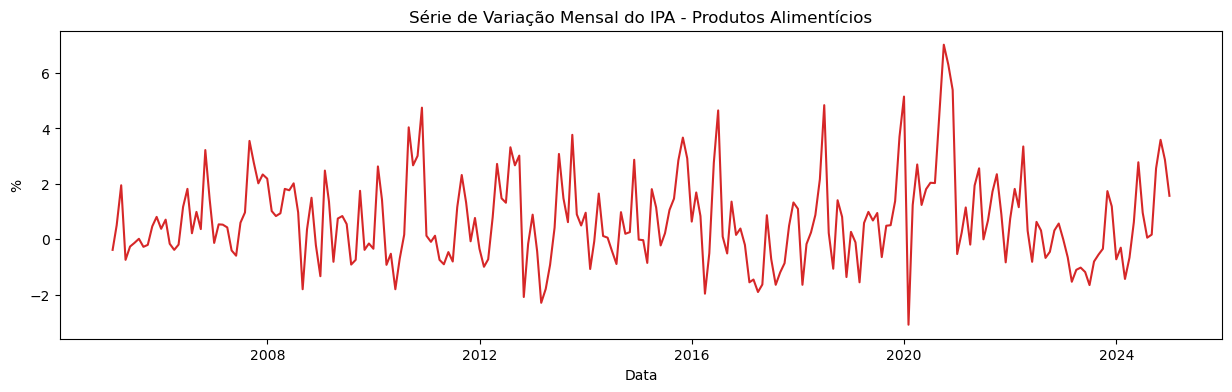

In [78]:
#Gráfico da Série de Variação Mensal do IPA - Produtos Alimenticios

plot_df(df_ipa_final, x = df_ipa_final["Mes"], y = df_ipa_final['Produtos Alimenticios'],
       title = "Série de Variação Mensal do IPA - Produtos Alimentícios")

## Modelagem para obtenção de dados faltantes: Variação Mensal do IPA - Produtos Quimicos

In [79]:
df_ipa["Produtos Quimicos"]

0         -
1         -
2         -
3         -
4         -
       ... 
235    1.55
236    1.33
237   -0.58
238    0.46
239    1.46
Name: Produtos Quimicos, Length: 240, dtype: object

### Modelos de Predição Utilizando RandomForest

#### Busca do Melhor Modelo de RandomForest com GridSearch e Cross Validation

In [80]:
# Configuração do TimeSeriesSplit (divisão da base de treinamento)
tscv = TimeSeriesSplit(n_splits=4)  

# Definição dos hiperparâmetros a serem testados
param_grid = [
    {'n_estimators': [10, 20, 40, 50, 70, 90, 100, 120], 'max_features': [5, 10, 20, 25, 30, 40]},
    {'bootstrap': [False], 'n_estimators': [10, 20, 40, 50, 70, 90, 100, 120], 'max_features': [5, 10, 20, 25, 30, 40]},
]

#bootstrap = False indica que a amostragem de dados para as árvores não deve ser feita com reposição


# Modelo a ser ajustado
forest_reg = RandomForestRegressor(random_state = 42)

# Configuração do GridSearchCV
grid_search = GridSearchCV(
    estimator=forest_reg,
    param_grid=param_grid,
    cv = tscv,  
    scoring= {'neg_mean_squared_error': 'neg_mean_squared_error',
               'r2': 'r2', 
               "neg_mean_absolute_error": "neg_mean_absolute_error",
               "neg_mean_absolute_percentage_error":"neg_mean_absolute_percentage_error"},
    refit='neg_mean_squared_error',
    return_train_score=True
)

grid_search.fit(df_ipa_exog_trein, df_ipa_trein["Produtos Quimicos"])

# Melhores parâmetros
print("Melhores parâmetros:", grid_search.best_params_)

# Melhor desempenho
print("Melhor score (MSE negativo):", grid_search.best_score_)

Melhores parâmetros: {'max_features': 25, 'n_estimators': 100}
Melhor score (MSE negativo): -1.5573386667424245


In [81]:
#Obtenção dos resultados de cada modelo cujos parâmetros foram considerados para o GridSearch

results = grid_search.cv_results_

In [82]:
# Extraindo os MSEs, MSREs e R²s dos Resultados do GridSearch
mses = -results['mean_test_neg_mean_squared_error'] 
msres = np.sqrt(mses) 
r2s = results['mean_test_r2']  
mape = -results["mean_test_neg_mean_absolute_percentage_error"] 
mae = -results['mean_test_neg_mean_absolute_error'] 

# Organizando em um DataFrame para visualização
param_combinations = results['params']
metrics_df = pd.DataFrame({
    'Params': param_combinations,
    'Mean MSE': mses,
    'Mean MSRE': msres,
    'Mean MAPE': mape,
    'Mean MAE': mae,
    'Mean R^2': r2s
})

# Ordenar os resultados por MSRE (ou outra métrica, se preferir)
metrics_df_sorted = metrics_df.sort_values(by='Mean MSRE')
metrics_df_sorted.round(2)

,Params,Mean MSE,Mean MSRE,Mean MAPE,Mean MAE,Mean R^2
46,"{'max_features': 40, 'n_estimators': 100}",1.56,1.25,8.563663e+12,1.01,0.08
30,"{'max_features': 25, 'n_estimators': 100}",1.56,1.25,8.563663e+12,1.01,0.08
38,"{'max_features': 30, 'n_estimators': 100}",1.56,1.25,8.563663e+12,1.01,0.08
29,"{'max_features': 25, 'n_estimators': 90}",1.58,1.26,1.014068e+13,1.01,0.05
37,"{'max_features': 30, 'n_estimators': 90}",1.58,1.26,1.014068e+13,1.01,0.05
...,...,...,...,...,...,...
81,"{'bootstrap': False, 'max_features': 30, 'n_es...",3.55,1.88,2.888104e+13,1.43,-1.42
73,"{'bootstrap': False, 'max_features': 25, 'n_es...",3.55,1.88,2.888104e+13,1.43,-1.42
72,"{'bootstrap': False, 'max_features': 25, 'n_es...",3.68,1.92,2.995576e+13,1.43,-1.45
80,"{'bootstrap': False, 'max_features': 30, 'n_es...",3.68,1.92,2.995576e+13,1.43,-1.45


In [83]:
#Geração do Regressor por RandomForest

regres_randfor = RandomForestRegressor(n_estimators=100, max_features = 25, random_state=42, oob_score=True)

regres_randfor.fit(df_ipa_exog_trein, df_ipa_trein["Produtos Quimicos"])

RandomForestRegressor(max_features=25, oob_score=True, random_state=42)

In [84]:
# Predições de IPA - Produtos Quimicos (Base Teste)

ipa_pred_randfor_quim = regres_randfor.predict(df_ipa_exog_teste)

In [85]:
# Avaliação do Modelo para Base de Teste:

aval_modelo( df_ipa_teste["Produtos Quimicos"], ipa_pred_randfor_quim)


Raiz do Erro Quadrático Médio do Modelo: 1.43

Erro Quadrático Médio do Modelo: 2.03

Erro Absoluto Médio NEGATIVO do Modelo: -1.13

Erro Percentual Absoluto Médio: 1.06

R^2 do Modelo: 0.34


Para Erro Absoluto Médio NEGATIVO, vale a convenção de quanto maior melhor, deve-se escolher o modelo que apresenta maior valor de erro absoluto médio negativo.


Para modelos obtidos por machine learning não se deve considerar o R^2


### Modelos de Predição Utilizando RandomForest com GradientBoosting

#### Busca do Melhor Modelo de RandomForest com GradientBoosting com GridSearch e Cross Validation

In [86]:
# Configuração do TimeSeriesSplit (divisão da base de treinamento)
tscv = TimeSeriesSplit(n_splits=4)  

# Definição dos hiperparâmetros a serem testados
param_grid = [
    {"n_estimators": [10, 20, 30, 40, 50, 60, 70, 100], "learning_rate": [0.005, 0.01, 0.05, 0.1, 0.5],
     "max_depth": [20], "loss": ["squared_error", "absolute_error", "huber"],"random_state": [42]}]

# Definir o modelo GradientBoostingRegressor
gbr = GradientBoostingRegressor()


# Configuração do GridSearchCV
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv = tscv,  
    scoring= {'neg_mean_squared_error': 'neg_mean_squared_error',
               'r2': 'r2', 
               "neg_mean_absolute_error": "neg_mean_absolute_error",
               "neg_mean_absolute_percentage_error":"neg_mean_absolute_percentage_error"},
    refit='neg_mean_squared_error',
    return_train_score=True
)

grid_search.fit(df_ipa_exog_trein, df_ipa_trein["Produtos Quimicos"])

# Melhores parâmetros
print("Melhores parâmetros:", grid_search.best_params_)

# Melhor desempenho
print("Melhor score (MSE negativo):", grid_search.best_score_)


Melhores parâmetros: {'learning_rate': 0.01, 'loss': 'huber', 'max_depth': 20, 'n_estimators': 50, 'random_state': 42}
Melhor score (MSE negativo): -1.8872210188297207


In [87]:
#Obtenção dos resultados de cada modelo cujos parâmetros foram considerados para o GridSearch

results = grid_search.cv_results_

In [88]:
# Extraindo os MSEs, MSREs e R²s dos Resultados do GridSearch
mses = -results['mean_test_neg_mean_squared_error'] 
msres = np.sqrt(mses) 
r2s = results['mean_test_r2']  
mape = -results["mean_test_neg_mean_absolute_percentage_error"] 
mae = -results['mean_test_neg_mean_absolute_error'] 

# Organizando em um DataFrame para visualização
param_combinations = results['params']
metrics_df = pd.DataFrame({
    'Params': param_combinations,
    'Mean MSE': mses,
    'Mean MSRE': msres,
    'Mean MAPE': mape,
    'Mean MAE': mae,
    'Mean R^2': r2s
})

# Ordenar os resultados por MSRE (ou outra métrica, se preferir)
metrics_df_sorted = metrics_df.sort_values(by='Mean MSRE')
metrics_df_sorted.round(2)

,Params,Mean MSE,Mean MSRE,Mean MAPE,Mean MAE,Mean R^2
44,"{'learning_rate': 0.01, 'loss': 'huber', 'max_...",1.89,1.37,2.296739e+13,1.08,-0.06
43,"{'learning_rate': 0.01, 'loss': 'huber', 'max_...",1.89,1.38,2.239303e+13,1.08,-0.03
23,"{'learning_rate': 0.005, 'loss': 'huber', 'max...",1.90,1.38,2.404798e+13,1.09,-0.07
45,"{'learning_rate': 0.01, 'loss': 'huber', 'max_...",1.90,1.38,2.335512e+13,1.09,-0.10
87,"{'learning_rate': 0.1, 'loss': 'absolute_error...",1.91,1.38,3.472777e+12,1.10,-0.19
...,...,...,...,...,...,...
101,"{'learning_rate': 0.5, 'loss': 'squared_error'...",3.34,1.83,2.620499e+13,1.45,-1.19
100,"{'learning_rate': 0.5, 'loss': 'squared_error'...",3.34,1.83,2.620499e+13,1.45,-1.19
99,"{'learning_rate': 0.5, 'loss': 'squared_error'...",3.34,1.83,2.620499e+13,1.45,-1.19
98,"{'learning_rate': 0.5, 'loss': 'squared_error'...",3.34,1.83,2.620499e+13,1.45,-1.19


In [89]:
#Criando variável contendo parâmetros para servir de entrada para o GradientBoostingRegressor:

params = {'n_estimators': 50, 'max_depth': 20, 'learning_rate': 0.01, 'loss': "huber", "random_state": 42}

In [90]:
#Geração do modelo de RandomForest Regression com Gradient Boosting:

regres_randfor_grad = GradientBoostingRegressor(**params)

In [91]:
#Ajuste do modelo:

regres_randfor_grad.fit(df_ipa_exog_trein, df_ipa_trein["Produtos Quimicos"])

GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=20,
                          n_estimators=50, random_state=42)

In [92]:
# Predições de IPA - Produtos Quimicos (Base Teste)

ipa_pred_randfor_grad_quim = regres_randfor_grad.predict(df_ipa_exog_teste)

In [93]:
# Avaliação do Modelo para Base de Teste:

aval_modelo( df_ipa_teste["Produtos Quimicos"], ipa_pred_randfor_grad_quim)


Raiz do Erro Quadrático Médio do Modelo: 1.64

Erro Quadrático Médio do Modelo: 2.68

Erro Absoluto Médio NEGATIVO do Modelo: -1.34

Erro Percentual Absoluto Médio: 1.18

R^2 do Modelo: 0.14


Para Erro Absoluto Médio NEGATIVO, vale a convenção de quanto maior melhor, deve-se escolher o modelo que apresenta maior valor de erro absoluto médio negativo.


Para modelos obtidos por machine learning não se deve considerar o R^2


### Modelos de Predição Utilizando RandomForest com AdaBoost

#### Busca do Melhor Modelo de RandomForest com AdaBoost com GridSearch e Cross Validation

In [94]:
# Configuração do TimeSeriesSplit (divisão da base de treinamento)
tscv = TimeSeriesSplit(n_splits=4)  

# Definição dos hiperparâmetros a serem testados
param_grid = [
    {"n_estimators": [5, 10, 20, 30, 40], "learning_rate": [0.01, 0.05, 0.1, 0.5],
     "loss": ['linear', 'square', 'exponential'],"random_state": [42]}]

# Definir o modelo base para o AdaBoost (Árvore de Decisão)
base_modelo = RandomForestRegressor(max_depth=10)

# Definir o modelo AdaBoost para regressão
adaboost = AdaBoostRegressor(estimator=base_modelo)


# Configuração do GridSearchCV
grid_search = GridSearchCV(
    estimator=adaboost,
    param_grid=param_grid,
    cv = tscv,  
    scoring= {'neg_mean_squared_error': 'neg_mean_squared_error',
               'r2': 'r2', 
               "neg_mean_absolute_error": "neg_mean_absolute_error",
               "neg_mean_absolute_percentage_error":"neg_mean_absolute_percentage_error"},
    refit='neg_mean_squared_error',
    return_train_score=True
)

grid_search.fit(df_ipa_exog_trein, df_ipa_trein["Produtos Quimicos"])

# Melhores parâmetros
print("Melhores parâmetros:", grid_search.best_params_)

# Melhor desempenho
print("Melhor score (MSE negativo):", grid_search.best_score_)


Melhores parâmetros: {'learning_rate': 0.1, 'loss': 'square', 'n_estimators': 20, 'random_state': 42}
Melhor score (MSE negativo): -1.5549418557120074


In [95]:
#Obtenção dos resultados de cada modelo cujos parâmetros foram considerados para o AdaBoost

results = grid_search.cv_results_

In [96]:
# Extraindo os MSEs, MSREs e R²s dos Resultados do GridSearch
mses = -results['mean_test_neg_mean_squared_error'] 
msres = np.sqrt(mses) 
r2s = results['mean_test_r2']  
mape = -results["mean_test_neg_mean_absolute_percentage_error"] 
mae = -results['mean_test_neg_mean_absolute_error'] 

# Organizando em um DataFrame para visualização
param_combinations = results['params']
metrics_df = pd.DataFrame({
    'Params': param_combinations,
    'Mean MSE': mses,
    'Mean MSRE': msres,
    'Mean MAPE': mape,
    'Mean MAE': mae,
    'Mean R^2': r2s
})

# Ordenar os resultados por MSRE (ou outra métrica, se preferir)
metrics_df_sorted = metrics_df.sort_values(by='Mean MSRE')
metrics_df_sorted.round(2)

,Params,Mean MSE,Mean MSRE,Mean MAPE,Mean MAE,Mean R^2
37,"{'learning_rate': 0.1, 'loss': 'square', 'n_es...",1.55,1.25,8.746926e+12,0.99,0.05
17,"{'learning_rate': 0.05, 'loss': 'linear', 'n_e...",1.57,1.25,1.194477e+13,0.99,0.05
22,"{'learning_rate': 0.05, 'loss': 'square', 'n_e...",1.58,1.26,1.089393e+13,1.01,0.07
38,"{'learning_rate': 0.1, 'loss': 'square', 'n_es...",1.58,1.26,1.155351e+13,0.99,0.03
39,"{'learning_rate': 0.1, 'loss': 'square', 'n_es...",1.59,1.26,8.746926e+12,1.00,0.03
4,"{'learning_rate': 0.01, 'loss': 'linear', 'n_e...",1.59,1.26,1.513767e+13,1.00,0.02
2,"{'learning_rate': 0.01, 'loss': 'linear', 'n_e...",1.60,1.26,1.044699e+13,1.00,0.03
29,"{'learning_rate': 0.05, 'loss': 'exponential',...",1.60,1.27,1.573360e+13,1.01,0.01
24,"{'learning_rate': 0.05, 'loss': 'square', 'n_e...",1.60,1.27,1.235704e+13,1.01,0.02
56,"{'learning_rate': 0.5, 'loss': 'exponential', ...",1.60,1.27,1.573360e+13,1.00,0.04


In [97]:
#Geração do modelo de RandomForest Regression com AdaBoost:

regres_randfor_ada_quim = AdaBoostRegressor(RandomForestRegressor(max_depth=10), n_estimators=20, random_state = 42, loss = "square",
                                      learning_rate = 0.1)

In [98]:
#Ajuste do modelo:

regres_randfor_ada_quim.fit(df_ipa_exog_trein, df_ipa_trein["Produtos Quimicos"])

AdaBoostRegressor(estimator=RandomForestRegressor(max_depth=10),
                  learning_rate=0.1, loss='square', n_estimators=20,
                  random_state=42)

In [99]:
# Predições de IPA - Produtos Quimicos (Base Teste)

ipa_pred_randfor_ada_quim = regres_randfor_ada_quim.predict(df_ipa_exog_teste)

In [100]:
# Avaliação do Modelo para Base de Teste:

aval_modelo( df_ipa_teste["Produtos Quimicos"], ipa_pred_randfor_ada_quim)


Raiz do Erro Quadrático Médio do Modelo: 1.34

Erro Quadrático Médio do Modelo: 1.78

Erro Absoluto Médio NEGATIVO do Modelo: -1.11

Erro Percentual Absoluto Médio: 1.06

R^2 do Modelo: 0.43


Para Erro Absoluto Médio NEGATIVO, vale a convenção de quanto maior melhor, deve-se escolher o modelo que apresenta maior valor de erro absoluto médio negativo.


Para modelos obtidos por machine learning não se deve considerar o R^2


## Comparação de Desempenho entre Modelos

#### Melhores Modelos - de acordo com GridSearch com CrossValidation

Modelo 1 - Random Forest / parâmetros: n_estimators=100, max_features = 25, random_state=42, oob_score=True

Modelo 2 - Random Forest com Gradient Boosting / parâmetros: 'learning_rate': 0.01, 'loss': 'huber', 'max_depth': 20, 'n_estimators': 50, 'random_state': 42

Modelo 3 - Random Forest com AdaBoost / parâmetros: (max_depth=10), n_estimators=20, random_state = 42, loss = "square", learning_rate = 0.1)

In [101]:
dict_avalia_mod_rmse = {"Modelo_1": 1.43,
                     "Modelo_2": 1.64,
                        "Modelo_3": 1.34
                       }
df_rmse = pd.Series(dict_avalia_mod_rmse)

dict_avalia_mod_mse = {"Modelo_1": 2.03,
                     "Modelo_2": 2.68,
                       "Modelo_3": 1.78
                      }
df_mse = pd.Series(dict_avalia_mod_mse )

dict_avalia_mod_mae = {"Modelo_1": -1.13,
                     "Modelo_2": -1.34,
                       "Modelo_3": -1.11
                      }
df_mae = pd.Series(dict_avalia_mod_mae)


In [102]:
#Criação de tabela de comparação de desempenho dos modelos

df_avalia_modelos = pd.DataFrame({"Erro Médio Quad": df_mse, "Raiz Erro Méd Quad":df_rmse,"Erro Médio Absoluto":df_mae})
df_avalia_modelos

,Erro Médio Quad,Raiz Erro Méd Quad,Erro Médio Absoluto
Modelo_1,2.03,1.43,-1.13
Modelo_2,2.68,1.64,-1.34
Modelo_3,1.78,1.34,-1.11


Será utilizado a regressão por Random Forest com AdaBoost com parâmetros:(max_depth=10), n_estimators=20, random_state = 42, loss = "square", learning_rate = 0.1.

#### Regressão para obtenção dos dados de janeiro de 2005 a dezembro de 2007 para o IPA - Produtos Quimicos

In [103]:
# Regressões do IPA - Produtos Quimicos para a base de dados de jan/2005 a dez/2007

ipa_pred_quim = np.round(regres_randfor_ada_quim.predict(df_ipa_exog_2005),2)

In [104]:
#Conversão de np.ndarray para pd.Series para permitir inclusão dos dados de previsão no dataframe df_ipa:

ipa_pred_quim_2 = pd.Series(ipa_pred_quim)

In [105]:
ipa_pred_quim_2 

0     0.97
1     0.25
2     0.73
3     1.05
4    -0.52
5    -0.55
6    -0.70
7    -0.87
8     0.13
9    -0.06
10   -0.27
11   -0.13
12    0.27
13    0.40
14   -0.51
15    0.42
16    0.92
17    1.07
18   -0.32
19    1.06
20   -0.04
21    0.09
22    0.43
23    0.06
24   -0.20
25    0.18
26    0.41
27    0.79
28    0.87
29   -0.11
30    0.24
31    0.63
32    0.74
33    1.07
34    0.25
35    0.33
dtype: float64

In [106]:
df_ipa_final.loc[:, "Produtos Quimicos"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
235    1.55
236    1.33
237   -0.58
238    0.46
239    1.46
Name: Produtos Quimicos, Length: 240, dtype: float64

In [107]:
#Inclusão dos dados de regressão do IPA - Produtos Quimicos de janeiro de 2005 dezembro de 2007

df_ipa_final['Produtos Quimicos'] =  df_ipa_final['Produtos Quimicos'].fillna(value = ipa_pred_quim_2 )

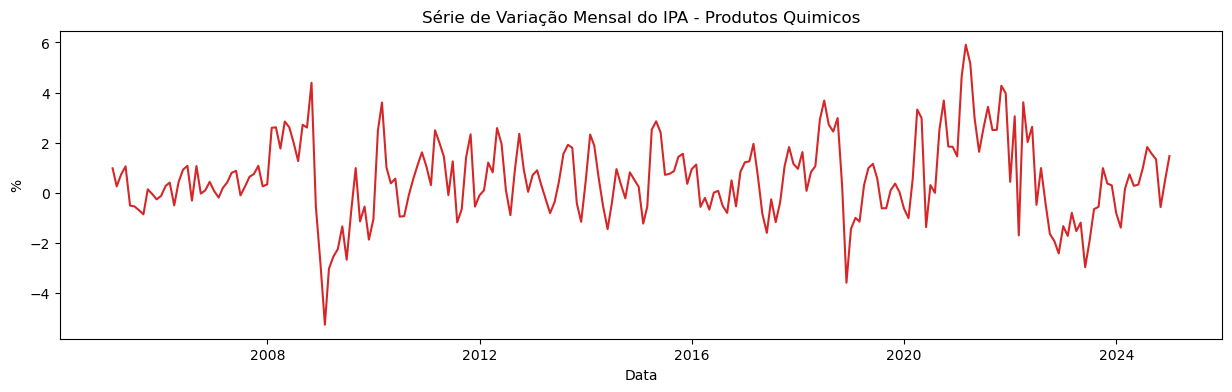

In [108]:
#Gráfico da Série de Variação Mensal do IPA - Produtos Quimicos

plot_df(df_ipa_final, x = df_ipa_final["Mes"], y = df_ipa_final['Produtos Quimicos'],
       title = "Série de Variação Mensal do IPA - Produtos Quimicos")

## Inclusão de coluna contendo a proxy de custo de produção da Indústria de Transformação

O cálculo da proxy do custos de produção da Indústria de Transformação utiliza os coeficientes técnicos fornecidos na tabela 14 da Matriz Insumo Produto do IBGE de 2015.

In [109]:
df_ipa_final.columns

Index(['Mes', 'Agricultura e Pecuaria', 'Carvao Mineral',
       'Petroleo e Gas Natural', 'Minerais Metalicos',
       'Minerais Nao-Metalicos', 'Produtos Alimenticios', 'Bebidas',
       'Fumo Processado e Produtos do Fumo', 'Produtos Texteis',
       'Artigos de Vestuario', 'Couros, Artigos para Viagem e Calcados',
       'Madeira Desdobrada e Produtos de Madeira',
       'Celulose, Papel e Produtos de Papel',
       'Produtos Derivados do Petroleo e Biocombustiveis', 'Produtos Quimicos',
       'Produtos Farmaceuticos', 'Artigos de Borracha e de Material Plastico',
       'Produtos de Minerais Nao-Metalicos', 'Metalurgia Basica',
       'Produtos de Metal',
       'Equipamentos de Informatica, Produtos Eletronicos e Opticos',
       'Maquinas, Aparelhos e Materiais Eletricos', 'Maquinas e Equipamentos',
       'Veiculos Automotores, Reboques, Carrocerias e Autopecas',
       'Embarcacoes, Veiculos Ferroviarios e Outros Equipamentos de Transporte',
       'Moveis', 'IPCA Serv Var Me

In [110]:
#Cálculo da Proxy do Custo da Industria de Transformação considerando os coeficientes técnicos da matriz insumo produto do IBGE 2015

df_proxy_custo_ind_transf = (0.22053*df_ipa_final["Produtos Alimenticios"] +
                             0.02516*df_ipa_final["Bebidas"] +
                             0.00522*df_ipa_final["Fumo Processado e Produtos do Fumo"]+
                             0.01523*df_ipa_final["Produtos Texteis"]+
                             0.01633*df_ipa_final["Artigos de Vestuario"]+
                             0.01249*df_ipa_final["Couros, Artigos para Viagem e Calcados"]+
                             0.00775*df_ipa_final["Madeira Desdobrada e Produtos de Madeira"]+
                             0.03218*df_ipa_final["Celulose, Papel e Produtos de Papel"]+
                             0.16493*df_ipa_final["Produtos Derivados do Petroleo e Biocombustiveis"]+
                             0.09938*df_ipa_final["Produtos Quimicos"]+
                             0.01640*df_ipa_final["Produtos Farmaceuticos"]+
                             0.03506*df_ipa_final["Artigos de Borracha e de Material Plastico"]+
                             0.02915*df_ipa_final["Produtos de Minerais Nao-Metalicos"]+
                             0.05898*df_ipa_final["Metalurgia Basica"]+
                             0.02659*df_ipa_final["Produtos de Metal"]+
                             0.03322*df_ipa_final["Equipamentos de Informatica, Produtos Eletronicos e Opticos"]+
                             0.02579*df_ipa_final["Maquinas, Aparelhos e Materiais Eletricos"]+
                             0.03862*df_ipa_final["Maquinas e Equipamentos"]+
                             0.08191*df_ipa_final["Veiculos Automotores, Reboques, Carrocerias e Autopecas"]+
                             0.01828*df_ipa_final["Embarcacoes, Veiculos Ferroviarios e Outros Equipamentos de Transporte"]+
                             0.01815*df_ipa_final["Moveis"]+
                             0.01865*df_ipa_final["IPCA Serv Var Mensal (%)"])                  


In [111]:
#Renomeando coluna do dataframe de cálculo da proxy de custo de produção da Industria de Transformação:

df_proxy_custo_ind_transf = df_proxy_custo_ind_transf.rename("Proxy - Custo Prod Ind Transf Var Mensal%")

In [112]:
#Concatenando dataframe da proxy do custo de produção da Industria de Transformaçãos ao dataframe da base de dados do IPA:

df_ipa_final = pd.concat([df_ipa_final, df_proxy_custo_ind_transf], axis = 1)      

In [113]:
df_ipa_final

,Mes,Agricultura e Pecuaria,Carvao Mineral,Petroleo e Gas Natural,Minerais Metalicos,Minerais Nao-Metalicos,Produtos Alimenticios,Bebidas,Fumo Processado e Produtos do Fumo,Produtos Texteis,...,Metalurgia Basica,Produtos de Metal,"Equipamentos de Informatica, Produtos Eletronicos e Opticos","Maquinas, Aparelhos e Materiais Eletricos",Maquinas e Equipamentos,"Veiculos Automotores, Reboques, Carrocerias e Autopecas","Embarcacoes, Veiculos Ferroviarios e Outros Equipamentos de Transporte",Moveis,IPCA Serv Var Mensal (%),Proxy - Custo Prod Ind Transf Var Mensal%
0,2005-01-31,-0.63,-0.18,NaN,-0.36,1.10,-0.38,1.86,3.15,1.14,...,1.63,1.14,-6.24,1.21,1.45,2.02,0.09,0.17,0.46,0.250514
1,2005-02-28,1.29,0.00,NaN,-4.20,-3.72,0.51,-0.31,0.02,-0.38,...,0.89,-0.43,-0.99,1.34,0.32,0.77,0.84,1.44,1.82,0.409522
2,2005-03-31,3.59,0.00,NaN,2.00,3.31,1.95,0.74,4.62,-0.14,...,0.10,0.66,1.83,0.46,0.16,-0.21,0.56,1.14,0.51,0.754040
3,2005-04-30,-1.60,0.00,NaN,15.87,0.69,-0.74,0.83,0.06,-0.34,...,0.09,0.84,1.48,1.54,0.34,1.12,-0.14,1.59,0.35,0.790196
4,2005-05-31,-2.76,3.22,NaN,2.30,-3.04,-0.26,0.77,-0.14,-0.48,...,-1.09,0.16,-4.96,0.47,1.72,0.43,-3.54,0.09,0.28,-0.343708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2024-08-31,0.30,0.00,NaN,-5.70,0.42,0.17,0.29,0.15,0.49,...,1.21,0.36,0.89,0.36,0.05,0.15,0.14,0.42,0.24,0.607579
236,2024-09-30,3.55,-0.15,NaN,-4.95,0.71,2.56,0.62,-0.94,0.52,...,1.04,-0.57,-0.48,0.03,0.38,0.23,0.65,0.40,0.15,0.775323
237,2024-10-31,3.46,0.00,NaN,9.89,0.11,3.59,0.52,-0.69,0.83,...,1.23,0.15,0.15,0.07,0.24,0.22,0.13,0.27,0.35,0.638631
238,2024-11-30,3.50,0.00,NaN,1.25,1.77,2.87,0.76,4.47,-0.05,...,2.42,0.24,-0.08,0.54,0.22,0.00,1.56,1.02,0.83,0.857047


### Criação de arquivo em formato csv

In [114]:
# Salvando dados em um arquivo Excel:

df_ipa_final.to_csv('base_dados_ipa_desag.csv', index=False)